In [2]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
os.getcwd()

'/home/studio-lab-user/Krishi/notebook'

In [3]:
from src.utils import get_path

ModuleNotFoundError: No module named 'src'

In [3]:
plant_dirs = list(os.listdir('/home/studio-lab-user/Krishi/data'))[1:]
plant_dirs

['Apple',
 'Bell Pepper',
 'Cherry',
 'Corn (Maize)',
 'Grape',
 'Peach',
 'Potato',
 'Strawberry',
 'Tomato']

In [4]:
def get_path(plant_dir:str, test:bool=False):
    
    if test:
        return '/home/studio-lab-user/Krishi/data/' + plant_dir + '/Test'
    
    else:
        return '/home/studio-lab-user/Krishi/data/' + plant_dir + '/Train'

In [5]:
def test_val_partitions(test_ds, val_split: float, shuffle: bool, shuffle_size: int):

    val_size = int(len(test_ds)*val_split)

    if shuffle:
        test_ds = test_ds.shuffle(shuffle_size, seed = 42)

    val_data = test_ds.take(val_size)
    test_data = test_ds.skip(val_size)

    return test_data, val_data

In [6]:
image_size = (256, 256)
batch_size = 32

In [7]:
plant_dataset_train = {}
print('================ Images & Classes for Training ================\n')
for plant in plant_dirs:
  print('>>> No. of Images & Classes in "{}" directory'.format(plant))
  plant_dataset_train[plant] = tf.keras.preprocessing.image_dataset_from_directory(
    get_path(plant),
    shuffle = True,
    labels = 'inferred',
    label_mode = 'int',
    image_size = image_size,
    batch_size = batch_size
  )
  print ("______________\n")

================ Images & Classes for Training ================

>>> No. of Images & Classes in "Apple" directory
Found 7771 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Bell Pepper" directory
Found 3901 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Cherry" directory
Found 3509 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Corn (Maize)" directory
Found 7316 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Grape" directory
Found 7222 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Peach" directory
Found 3566 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Potato" directory
Found 5702 files belonging to 3 classes.
______________

>>> No. of Images & Classes in "Strawberry" directory
Found 3598 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Tomato" directory
Found 18345 files

In [8]:
test_dataset = {}
print('============ Images & Classes for Testing & Validation ============\n')
for plant in plant_dirs:
  print('>>> No. of Images & Classes in "{}" directory'.format(plant))
  test_dataset[plant] = tf.keras.preprocessing.image_dataset_from_directory(
    get_path(plant, test = True),
    shuffle = True,
    labels = 'inferred',
    label_mode = 'int',
    image_size = image_size,
    batch_size = batch_size
  )
  print ("______________\n")
     

============ Images & Classes for Testing & Validation ============

>>> No. of Images & Classes in "Apple" directory
Found 1944 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Bell Pepper" directory
Found 975 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Cherry" directory
Found 877 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Corn (Maize)" directory
Found 1829 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Grape" directory
Found 1805 files belonging to 4 classes.
______________

>>> No. of Images & Classes in "Peach" directory
Found 891 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Potato" directory
Found 1426 files belonging to 3 classes.
______________

>>> No. of Images & Classes in "Strawberry" directory
Found 900 files belonging to 2 classes.
______________

>>> No. of Images & Classes in "Tomato" directory
Found 4585 files 

In [9]:
plant_dataset_test = {}
plant_dataset_val = {}
for plant in plant_dirs:
  plant_dataset_test[plant], plant_dataset_val[plant] = test_val_partitions(
      test_dataset[plant],
      val_split = 0.3,
      shuffle = True,
      shuffle_size = 10000
  )

In [10]:
classes = {}
for plant in plant_dirs:
  print('>>> Classes in {} dataset :-'.format(plant))
  classes[plant] = []
  for num,cat in enumerate(plant_dataset_train[plant].class_names, start = 1):
    classes[plant].append(cat)
    print(num, cat)
  print('\n')

>>> Classes in Apple dataset :-
1 Apple Scab
2 Black Rot
3 Cedar Apple Rust
4 Healthy


>>> Classes in Bell Pepper dataset :-
1 Bacterial Spot
2 Healthy


>>> Classes in Cherry dataset :-
1 Healthy
2 Powdery Mildew


>>> Classes in Corn (Maize) dataset :-
1 Cercospora Leaf Spot
2 Common Rust 
3 Healthy
4 Northern Leaf Blight


>>> Classes in Grape dataset :-
1 Black Rot
2 Esca (Black Measles)
3 Healthy
4 Leaf Blight


>>> Classes in Peach dataset :-
1 Bacterial Spot
2 Healthy


>>> Classes in Potato dataset :-
1 Early Blight
2 Healthy
3 Late Blight


>>> Classes in Strawberry dataset :-
1 Healthy
2 Leaf Scorch


>>> Classes in Tomato dataset :-
1 Bacterial Spot
2 Early Blight
3 Healthy
4 Late Blight
5 Leaf Mold
6 Mosaic Virus
7 Septoria Leaf Spot
8 Target Spot
9 Two-Spotted Spider Mite
10 Yellow Leaf Curl Virus




>>> Sample Images of "Apple" dataset


2023-04-10 11:08:18.081788: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7771]
	 [[{{node Placeholder/_4}}]]
2023-04-10 11:08:18.083468: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7771]
	 [[{{node Placeholder/_4}}]]


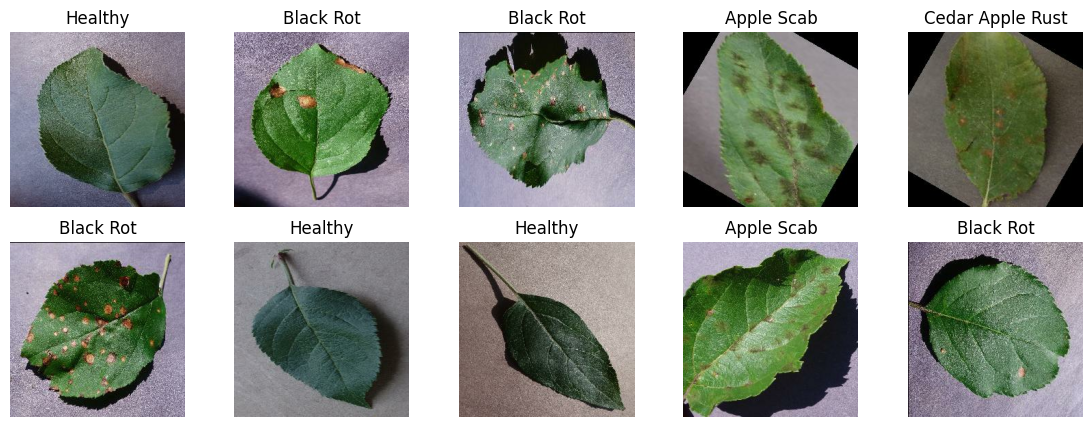



>>> Sample Images of "Bell Pepper" dataset


2023-04-10 11:08:19.277920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3901]
	 [[{{node Placeholder/_4}}]]
2023-04-10 11:08:19.278469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3901]
	 [[{{node Placeholder/_4}}]]


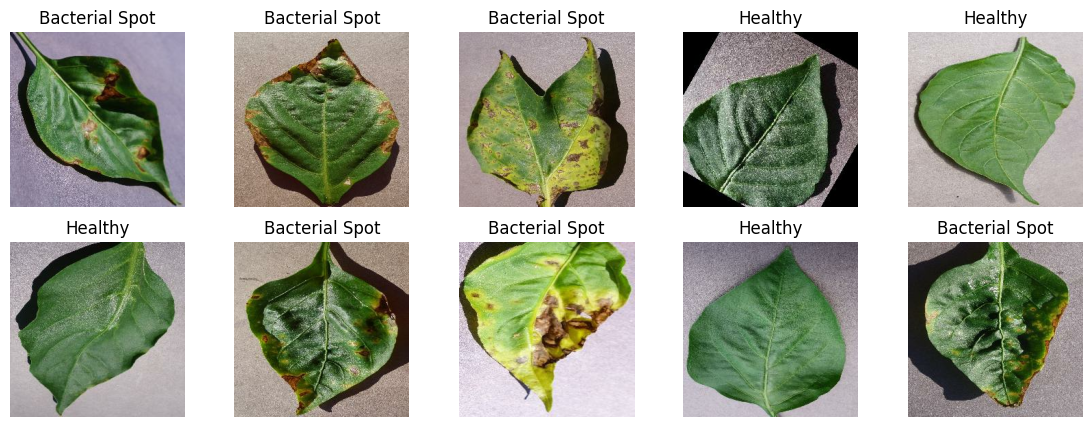



>>> Sample Images of "Cherry" dataset


2023-04-10 11:08:20.420132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3509]
	 [[{{node Placeholder/_4}}]]
2023-04-10 11:08:20.420600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3509]
	 [[{{node Placeholder/_4}}]]


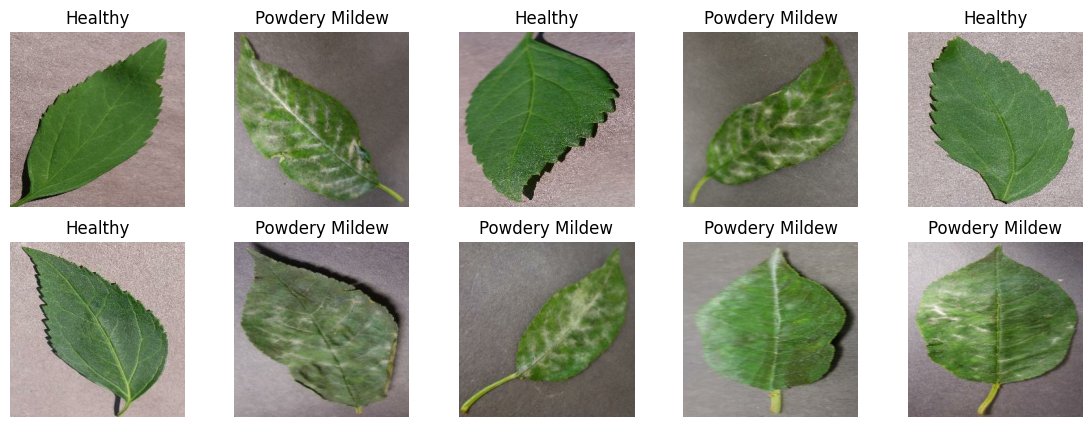



>>> Sample Images of "Corn (Maize)" dataset


2023-04-10 11:08:21.308239: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7316]
	 [[{{node Placeholder/_4}}]]
2023-04-10 11:08:21.308883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7316]
	 [[{{node Placeholder/_4}}]]


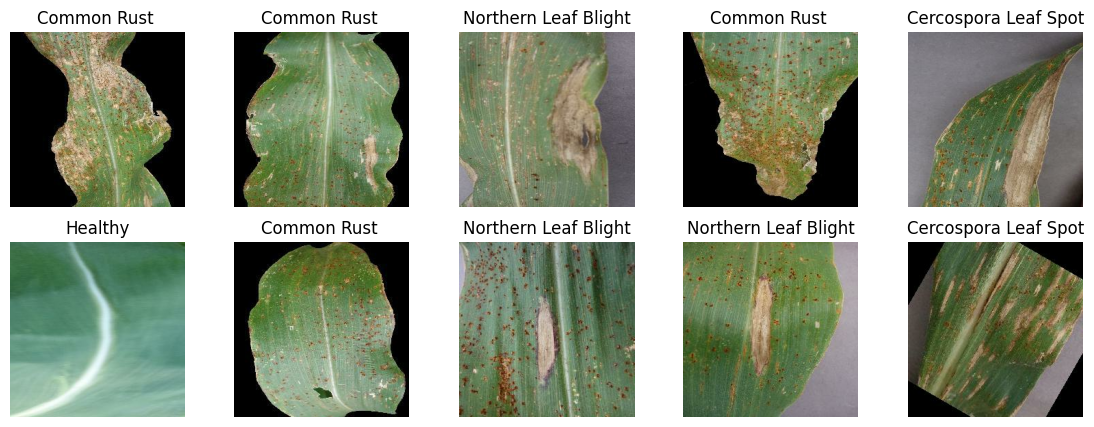



>>> Sample Images of "Grape" dataset


2023-04-10 11:08:22.255766: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [7222]
	 [[{{node Placeholder/_0}}]]
2023-04-10 11:08:22.256652: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [7222]
	 [[{{node Placeholder/_4}}]]


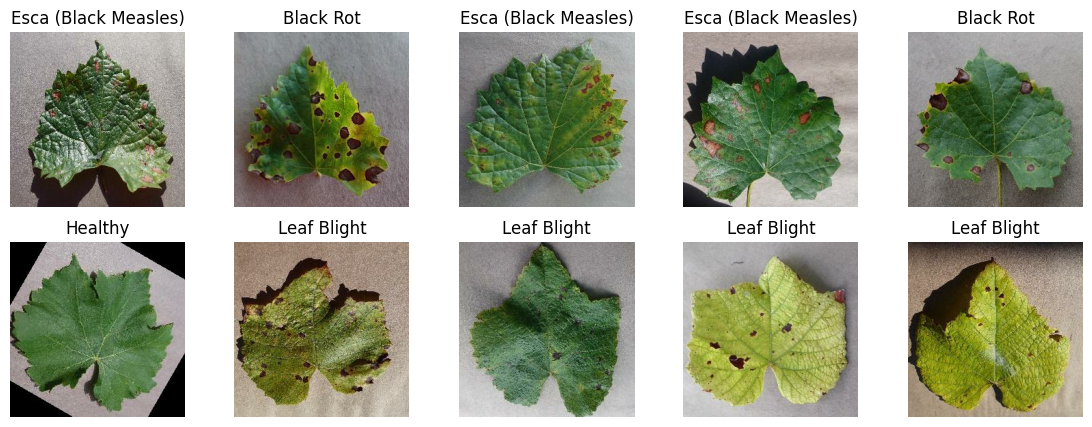



>>> Sample Images of "Peach" dataset


2023-04-10 11:08:23.349212: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3566]
	 [[{{node Placeholder/_4}}]]
2023-04-10 11:08:23.349787: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3566]
	 [[{{node Placeholder/_4}}]]


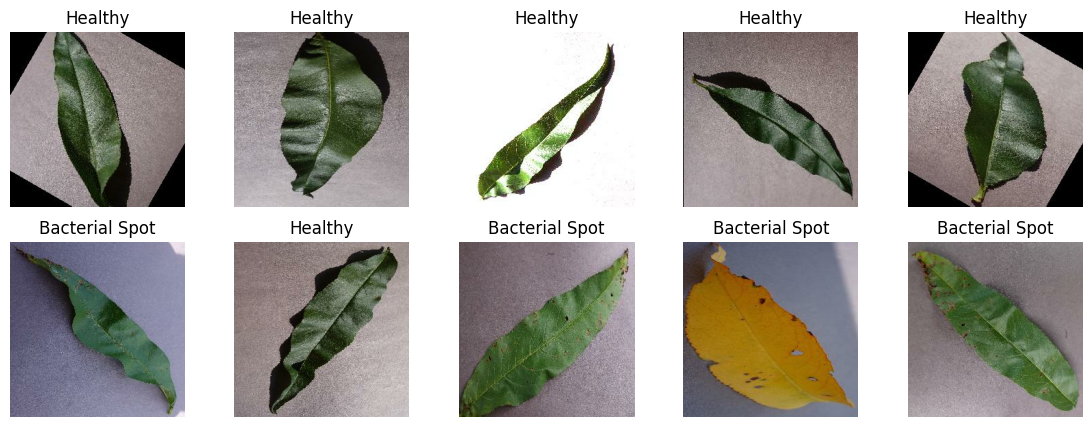



>>> Sample Images of "Potato" dataset


2023-04-10 11:08:24.319547: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [5702]
	 [[{{node Placeholder/_4}}]]
2023-04-10 11:08:24.320080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [5702]
	 [[{{node Placeholder/_0}}]]


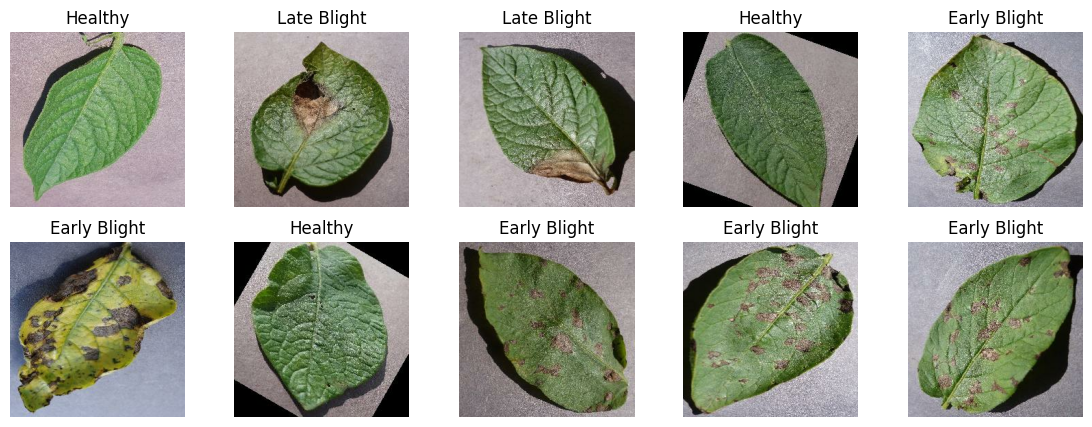



>>> Sample Images of "Strawberry" dataset


2023-04-10 11:08:25.622520: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [3598]
	 [[{{node Placeholder/_0}}]]
2023-04-10 11:08:25.623096: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [3598]
	 [[{{node Placeholder/_4}}]]


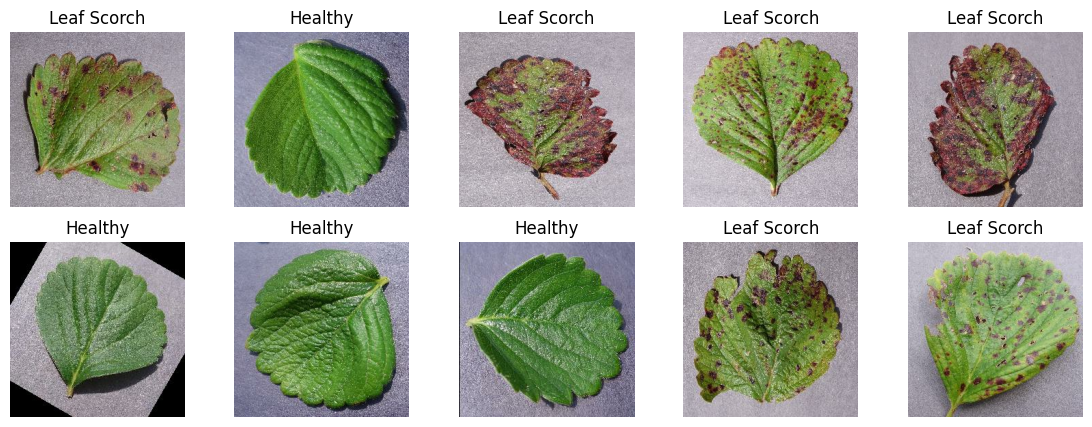



>>> Sample Images of "Tomato" dataset


2023-04-10 11:08:26.688979: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [18345]
	 [[{{node Placeholder/_0}}]]
2023-04-10 11:08:26.689457: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [18345]
	 [[{{node Placeholder/_4}}]]


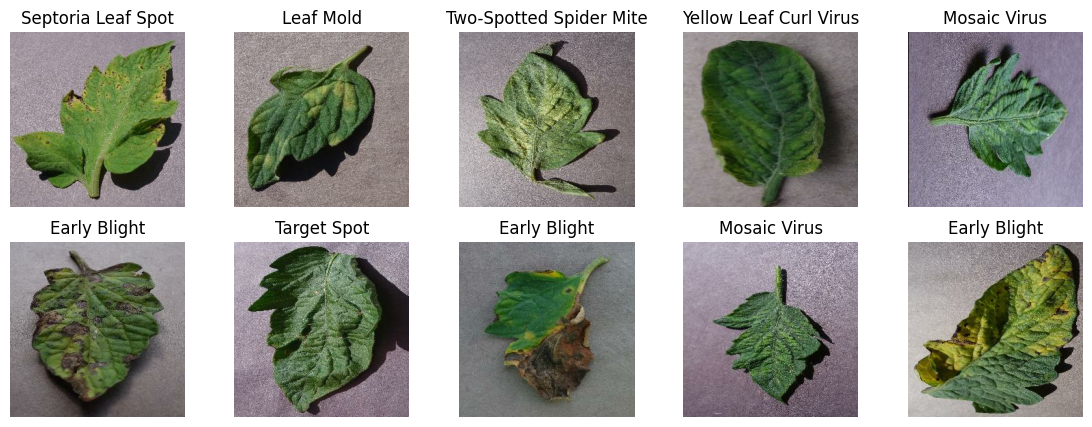

In [17]:
for plant in plant_dirs:
  print('>>> Sample Images of "{}" dataset'.format(plant))
  plt.figure(figsize = (14,5))
  for image_batch, image_label in plant_dataset_train[plant].take(1):
    for i in range(10):
      plt.subplot(2,5,i+1)
      plt.imshow(image_batch[i].numpy().astype('uint8'))
      plt.title(classes[plant][image_label[i]])
      plt.axis('off')
    plt.show()    
  print('\n')